Association Between Categorical Variables
A standard approach for testing the independence/dependence of a pair of categorical variables is to use a χ2 (Chi-squared) test of independence.

The null and alternative hypotheses for the χ2 test are as follows:

H0: the two categorical vxariables are independent<BR>
HA: the two categorical variables are dependent
   
https://bio204-class.github.io/Bio204-Fall-2016/chi-squared-test.html



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

titanic = pd.read_csv('titanic.csv')

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

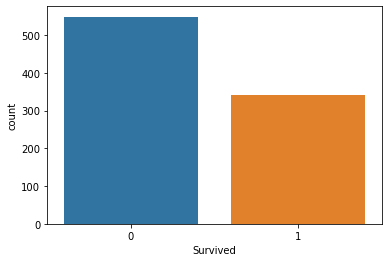

In [5]:
sns.countplot(x='Survived',data=titanic)

<AxesSubplot:xlabel='Sex', ylabel='count'>

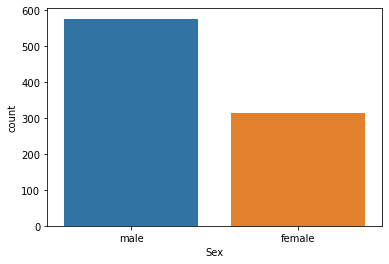

In [6]:
sns.countplot(x='Sex', data=titanic)

### Value Counts

In [15]:
titanic.value_counts('Survived', normalize=True)

Survived
0    0.616162
1    0.383838
dtype: float64

In [16]:
titanic.value_counts('Sex', normalize=True)

Sex
male      0.647587
female    0.352413
dtype: float64

In [17]:
def str_sex_tonum(sex):
    if sex == 'female':
        sex = 1
    elif sex == 'male':
        sex = 0
    return sex
titanic['Sex'] = titanic['Sex'].apply(str_sex_tonum)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [18]:
gender_survival = titanic[['Survived','Sex','Name']]
gender_survival

,Survived,Sex,Name
0,0,0,"Braund, Mr. Owen Harris"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,1,"Heikkinen, Miss. Laina"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,0,"Allen, Mr. William Henry"
...,...,...,...
886,0,0,"Montvila, Rev. Juozas"
887,1,1,"Graham, Miss. Margaret Edith"
888,0,1,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,0,"Behr, Mr. Karl Howell"


### Create a crosstab of Survived vs Sex

In [19]:
data_crosstab = pd.crosstab(titanic['Sex'],
                            titanic['Survived'], 
                               margins = True)
print(data_crosstab)

Survived    0    1  All
Sex                    
0         468  109  577
1          81  233  314
All       549  342  891


In [20]:
import numpy as np
obs = np.array([[data_crosstab[0][1],data_crosstab[1][1]], [data_crosstab[0][0],data_crosstab[1][0]] ])
chi2_contingency(obs)   # these two variables are not independent

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

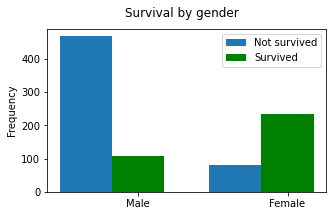

In [21]:
#Visualization: survival rate by gender

gender_surv1 = gender_survival[gender_survival['Survived']==0] 
gender_surv2 = gender_survival[gender_survival['Survived']==1]

#Generate gender summary statistics by survival for creating bar chart
no_surv = gender_surv1.groupby('Sex',as_index=False).count()
surv = gender_surv2.groupby('Sex',as_index=False).count()

n_group=2
objects=['Male','Female']
index=np.arange(n_group)
bar_width = 0.35
plt.figure(figsize=(5,3))
plt.bar(index,no_surv['Survived'],bar_width,label='Not survived')
plt.xticks(index+bar_width, objects)
plt.bar(index+bar_width,surv['Survived'],bar_width,color='g',label='Survived')
plt.legend(fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.suptitle('Survival by gender',fontsize=12)
plt.savefig('survival_by_gender.png');

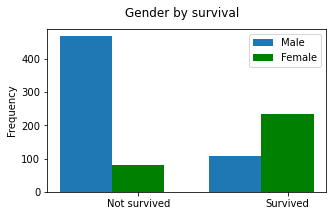

In [22]:
# Or, from a different perspective we can also get gender by survival
#Visualization: gender composition by survival
male = gender_survival[gender_survival['Sex']==0] 
female = gender_survival[gender_survival['Sex']==1]
#Generate survival summary statistics by gender for creating bar chart
m = male.groupby('Survived',as_index=False).count()
f = female.groupby('Survived',as_index=False).count()

n_group=2
objects=['Not survived','Survived']
index=np.arange(n_group)
bar_width = 0.35
plt.figure(figsize=(5,3))
plt.bar(index,m['Sex'],bar_width,label='Male')
plt.xticks(index+bar_width, objects)
plt.bar(index+bar_width,f['Sex'],bar_width,color='green',label='Female')
plt.legend(fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.suptitle('Gender by survival',fontsize=12)
plt.savefig('gender.png');

### Age & Survival

In [23]:
#Get the mean of age by survival
age_survival = titanic[['Survived','Age']] # 891 observations
age_surv = age_survival.dropna() #Drop missing values of age, and 714 observations are kept
age_surv.groupby('Survived',as_index=False).mean()

,Survived,Age
0,0,30.626179
1,1,28.343690


In [24]:
#Perform a t-test comparing the age mean between survived and non-survived
from scipy.stats import ttest_ind
surv1 = age_surv[age_surv['Survived']==0] 
surv2 = age_surv[age_surv['Survived']==1]
ttest_ind(surv1['Age'], surv2['Age'])

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

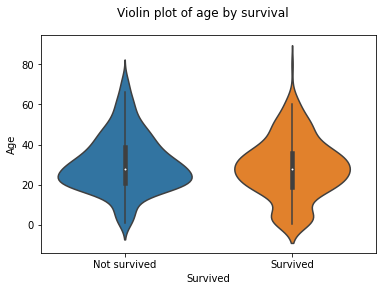

In [25]:
# Visualization: violin plot to show distribution of survivors and non-survivors
sns.violinplot(x='Survived',y='Age',data=age_surv)
plt.suptitle('Violin plot of age by survival')
plt.xticks([0,1], ['Not survived','Survived'])
plt.savefig('violin_age');

In [26]:
# Group age into children and adults
age_surv_kid = age_surv[age_surv['Age']<=16] 
age_surv_adult = age_surv[age_surv['Age']>16]

In [27]:
#Create a dataset with an indicator of children or adult
kid_surv=age_surv.copy()
kid_surv['kid']=''
def convert_kid(age):
    if age<=16:
        return 1
    else:
        return 0
kid_surv['kid']=kid_surv['Age'].apply(convert_kid)
kid_surv.head()

,Survived,Age,kid
0,0,22.0,0
1,1,38.0,0
2,1,26.0,0
3,1,35.0,0
4,0,35.0,0


In [28]:
kid_surv.groupby(['kid','Survived'],as_index=False).count()

,kid,Survived,Age
0,0,0,379
1,0,1,235
2,1,0,45
3,1,1,55


In [29]:
#chi-squared test of "kid" and "survived"
obs=np.array([[379,45],[235,55]])

from scipy.stats import chi2_contingency
chi2_contingency(obs)   # these two variables are not independent

(9.29343356092604,
 0.0022997670492624377,
 1,
 array([[364.6162465,  59.3837535],
        [249.3837535,  40.6162465]]))

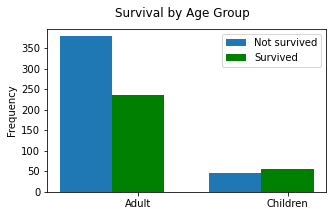

In [30]:
# Visualization: bar chart of survival by children vs adult
kid_surv_no=kid_surv[kid_surv['Survived']==0]
kid_surv_yes=kid_surv[kid_surv['Survived']==1]
no_surv = kid_surv_no.groupby('kid',as_index=False).count()
surv = kid_surv_yes.groupby('kid',as_index=False).count()

n_group=2
objects=['Adult','Children']
index=np.arange(n_group)
bar_width = 0.35
plt.figure(figsize=(5,3))
plt.bar(index,no_surv['Survived'],bar_width,label='Not survived')
plt.xticks(index+bar_width, objects)
plt.bar(index+bar_width,surv['Survived'],bar_width,color='green',label='Survived')
plt.legend(fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.suptitle('Survival by Age Group',fontsize=12)
plt.savefig('survival_by_kid.png');

### Fare & Survival

In [31]:
#Create data of survival and fare only
fare_survival=titanic[['Survived','Fare']]

In [32]:
#t-test of the mean of fare between survivors and non-survivors
fare_surv1 = fare_survival[fare_survival['Survived']==0] 
fare_surv2 = fare_survival[fare_survival['Survived']==1]
ttest_ind(fare_surv1['Fare'], fare_surv2['Fare'])

Ttest_indResult(statistic=-7.939191660871055, pvalue=6.120189341924198e-15)

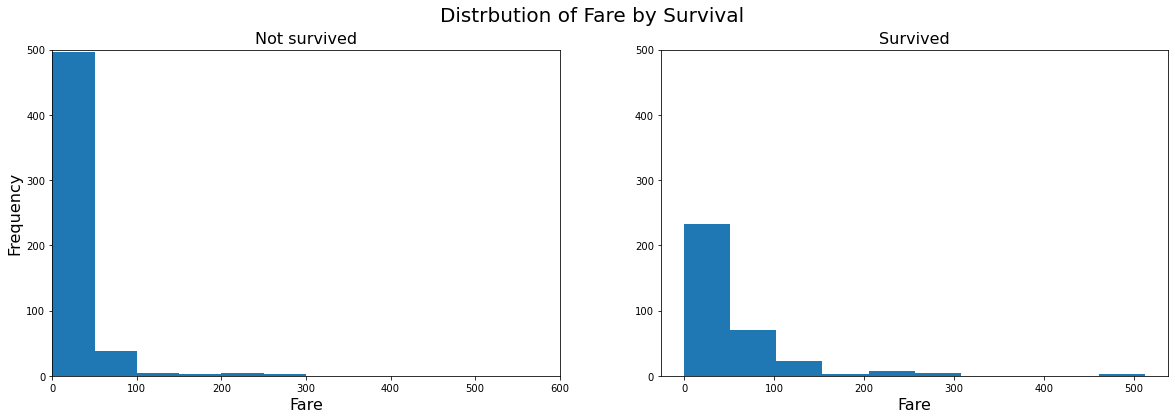

In [33]:
#Visualization: histogram of fare by survival
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
plt.hist(fare_surv1['Fare'],bins=[0,50,100,150,200,250,300,350])
plt.title('Not survived',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Fare',fontsize=16)
plt.ylim(0,500)
plt.xlim(0,600)

plt.subplot(1,2,2)
plt.hist(fare_surv2['Fare'])
plt.title('Survived',fontsize=16)
plt.ylim(0,500)
plt.xlabel('Fare',fontsize=16)

plt.suptitle('Distrbution of Fare by Survival',fontsize=20)
plt.savefig("hist_fare.png");

### Class  vs Survival

In [34]:
#Get the survival rate by class
class_survival = titanic[['Survived','Pclass','Name']] # 891 observations
class_survival.groupby(['Pclass','Survived'],as_index=False).count()

,Pclass,Survived,Name
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [35]:
#chi-squared test of "Sex" and "Survived"
obs=np.array([[80,136],[97,87],[372,119]])
chi2_contingency(obs)   # these two variables are not independent

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

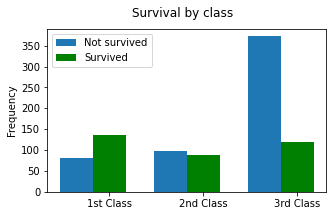

In [36]:
#Visualization: survival rate by class

class_surv1 = class_survival[class_survival['Survived']==0] 
class_surv2 = class_survival[class_survival['Survived']==1]

#Generate gender summary statistics by survival for creating bar chart
no_surv_class = class_surv1.groupby('Pclass',as_index=False).count()
surv_class = class_surv2.groupby('Pclass',as_index=False).count()

n_group=3
objects=['1st Class','2nd Class', '3rd Class']
index=np.arange(n_group)
bar_width = 0.35
plt.figure(figsize=(5,3))
plt.bar(index,no_surv_class['Survived'],bar_width,label='Not survived')
plt.xticks(index+bar_width, objects)
plt.bar(index+bar_width,surv_class['Survived'],bar_width,color='green',label='Survived')
plt.legend(loc='best',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.suptitle('Survival by class',fontsize=12)
plt.savefig('survival_by_class.png');

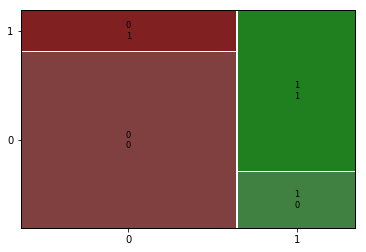

In [37]:
mosaic(data=titanic, index=['Sex', 'Survived'], statistic=False, axes_label=True);